##### Task 1
Create a function to represent the web as a graph where each node represents a webpage, and edges represent hyperlinks from one page to another. To model the web graph, you can use a dictionary in Python where each key is a unique webpage, and the corresponding value is a list of webpages that the key webpage links to. This task involves creating a function create_web_graph(links) where links is a list of tuples, with each tuple representing a directed link from one page to another (e.g., ('PageA', 'PageB') signifies a link from Page A to Page B). The function should return a dictionary representing the graph. Utilize the collections module for more efficient data structures if necessary.
1.	Use a dictionary to represent the graph; keys are webpages, values are lists of linked webpages.
2.	create_web_graph(links) takes a list of (source, target) tuples representing directed edges.
3.	Begin with an empty dictionary to which nodes and edges will be added.
4.	Add each source as a key to the dictionary, appending targets to its list, ensuring all targets are also keys.
5.	Output the complete dictionary as the web graph after adding all links.


In [57]:
links=[('B','C'),('B','G'),('C','A'),('D','C'),('E','C'),('F','C'),('F','G'),('G','B'),] 
def create_web_graph(links):
    graph={}
    for source,target in links:
        if source not in graph:
            graph[source]=[]
        graph[source].append(target)
    return graph

web_graph=create_web_graph(links)
print(web_graph)


{'B': ['C', 'G'], 'C': ['A'], 'D': ['C'], 'E': ['C'], 'F': ['C', 'G'], 'G': ['B']}


##### Task 2
Implement the basic PageRank algorithm to calculate the rank of each page based on the number and quality of incoming links.  This task involves creating a function calculate_pagerank(graph, iterations, d=0.85) where graph is the web graph created in Task 1, iterations defines how many times the algorithm will run to update the PageRank values, and d is the damping factor, usually set to 0.85. Initialize the rank of each page to 1/N where N is the total number of pages. In each iteration, update the rank of each page based on the ranks of pages linking to it, considering the damping factor and the probability of jumping to a page at random. The function should return a dictionary with pages as keys and their corresponding PageRank as values.


In [58]:
def calculate_pagerank(graph,iterations,d=0.85):
    page_rank={}
    for page in graph:
        page_rank[page]=1/len(graph)
    for iterations in range(iterations):
        for page in graph:
            sum=1-d
            for other_page in graph:
                if page in graph[other_page]:
                    sum+=d*(page_rank[other_page]/len(graph[other_page]))
            page_rank[page]=sum
    return page_rank

page_ranks=calculate_pagerank(web_graph,30)
ranked_pages=sorted(page_ranks.items(), key=lambda x:x[1], reverse=True)
for page,rank in ranked_pages:
    print(f"{page}: {rank}")

C: 0.689442270058694
B: 0.519275929549868
G: 0.43444227005869396
D: 0.15000000000000002
E: 0.15000000000000002
F: 0.15000000000000002


##### Task 3
Modify the PageRank calculation to handle dangling pages (pages with no outbound links) by redistributing their rank equally among all pages. Enhance the calculate_pagerank function from Task 2 to identify dangling pages and adjust the rank calculation accordingly. After calculating the PageRank for each iteration, check for pages that do not link to any other page. Distribute the rank of these dangling pages equally to all pages in the next iteration. This ensures the total rank in the system remains constant, and the presence of dangling pages does not skew the results.


In [59]:
def calculate_pagerankt3(graph, iterations=30, d=0.85):
  N = len(graph)
  dangling_pages = []
  pagerank = dict.fromkeys(graph, 1/N)
  for page in graph:
    if not graph[page]:
      dangling_pages.append(page)
  for _ in range(iterations):
    dangling_rank_mass = 0
    for page in dangling_pages:
      dangling_rank_mass += pagerank[page]
    new_pagerank = {}
    for page, outgoing_links in graph.items():
      sum_pagerank = 0
      for source in graph:
        if page in graph[source]:
          out_degree = len(graph[source])
          sum_pagerank += pagerank[source] / out_degree
      new_pagerank[page] = (1 - d) + d * sum_pagerank
    for page in graph:
      if page not in dangling_pages:
        pagerank[page] = new_pagerank[page]
    total_rank_addition = dangling_rank_mass / N
    for page in graph:
      pagerank[page] += total_rank_addition
  return pagerank

page_ranks = calculate_pagerankt3(web_graph)
print(page_ranks)

{'B': 0.5192758513181764, 'C': 0.6894422077011872, 'D': 0.15000000000000002, 'E': 0.15000000000000002, 'F': 0.15000000000000002, 'G': 0.43444220770118724}


##### Task 4
Implement a convergence check to stop the algorithm when the PageRank values stop changing significantly. Modify the calculate_pagerank function to include a parameter tolerance that defines the maximum allowed change in PageRank values between iterations before considering the algorithm to have converged. After each iteration, calculate the sum of absolute differences in PageRank values between the current and previous iterations for all pages. If this sum is less than tolerance, consider the algorithm to have converged and stop the iteration. This addition will make the algorithm more efficient by preventing unnecessary calculations.


In [60]:
def calculate_pagerankt4(graph,iterations,d=0.85,tolerance= 0.001):
    converged=False
    page_rank={}
    for page in graph:
        page_rank[page]=1/len(graph)
    for iteration in range(iterations):
        new_page_rank={}
        diff=0
        for page in graph:
            sum=1-d
            for other_page in graph:
                if page in graph[other_page]:
                    sum+=d*(page_rank[other_page]/len(graph[other_page]))
                    diff+=abs(page_rank[page]-sum)
            if diff<tolerance:
                converged=True
                print("Converged at iteration:",iteration)
            new_page_rank[page]=sum
        if converged:
            break   
        page_rank=new_page_rank
    return page_rank

page_ranks=calculate_pagerankt4(web_graph,100)
print(page_ranks)

Converged at iteration: 10
{'B': 0.5172091014710642, 'C': 0.6877948274832464, 'D': 0.15000000000000002, 'E': 0.15000000000000002, 'F': 0.15000000000000002, 'G': 0.4327948274832464}


##### Task 5
Create a visualization of the web graph with nodes sized according to their PageRank score to help understand the distribution of importance across pages. Use the networkx library in Python to create and visualize the graph. First, generate a NetworkX graph from your web graph dictionary. Then, use the calculate_pagerank function to get the PageRank scores and apply these scores to determine the size of each node in the graph visualization. Utilize matplotlib for drawing the graph with networkx.draw function, where node size is proportional to its PageRank score. This task not only helps in debugging and analyzing the PageRank distribution but also provides insightful visual feedback on the structure and hierarchy of the web graph.


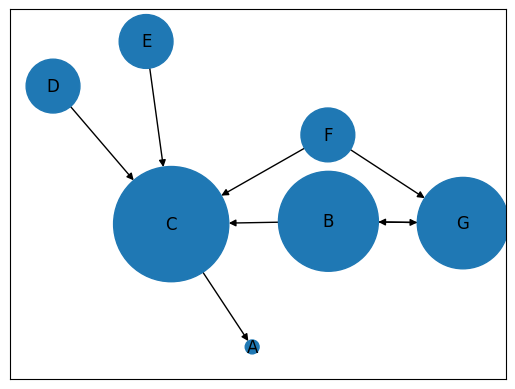

<Figure size 1200x1200 with 0 Axes>

In [124]:
import networkx as nx
import matplotlib.pyplot as plt
def visualize_pagerank(graph, pagerank_scores):
    G = nx.DiGraph(graph)
    node_sizes = [pagerank_scores[node] * 10000 if node in pagerank_scores else 100 for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes)
    plt.show()

visualize_pagerank(web_graph, page_ranks)

